# Part 4 - Autonomous Vehicles

PROJECT OBJECTIVE: We will build a digit classifier on the SVHN (Street View Housing Number) dataset

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, BatchNormalization, Dropout, LeakyReLU
import seaborn as sns
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

# Load and visulaizing Data

In [2]:
dataset = h5py.File("Autonomous_Vehicles_SVHN_single_grey1.h5","r")

In [3]:
X_train = dataset['X_train'][:] 
y_train = dataset['y_train'][:] 
X_val = dataset['X_test'][:] 
y_val = dataset['y_test'][:]

In [4]:
print("Training set feature shape", X_train.shape) 
print("Training set target shape", y_train.shape) 
print("Validation set feature shape", X_val.shape) 
print("Validation set target shape", y_val.shape)

Training set feature shape (42000, 32, 32)
Training set target shape (42000,)
Validation set feature shape (18000, 32, 32)
Validation set target shape (18000,)


In [5]:
dataset.close()

### Viewing the data

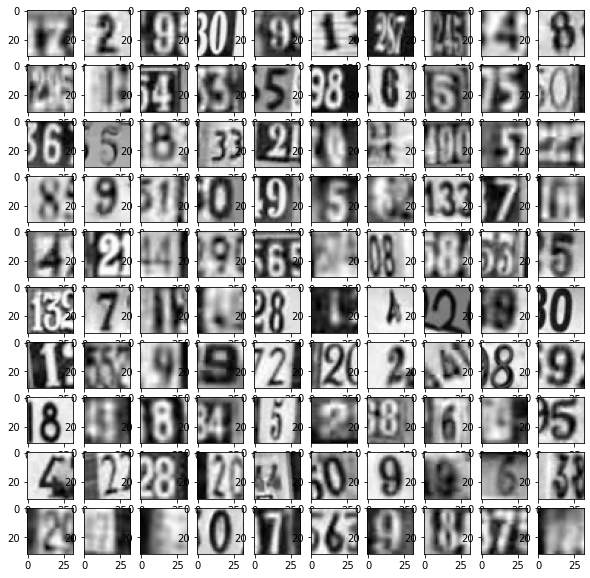

In [6]:
fig=plt.figure(figsize=(10,10))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_val[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

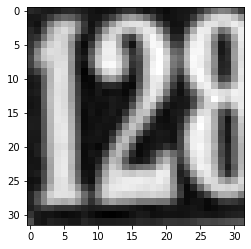

Label:  2


In [7]:
# show the number in the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

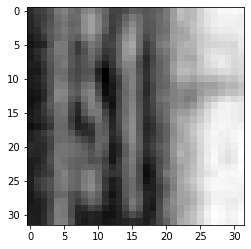

Label:  1


In [8]:
# show the number in the dataset
plt.imshow(X_val[0],cmap='gray')    
plt.show()
print('Label: ', y_val[0])

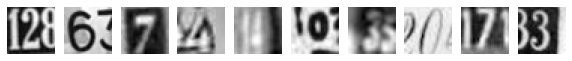

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## Building a Neural Network

#### Reshaping the data 

In [10]:
#Reshape data from 2D to 1D -> 32X32 to 1024

X_train = np.asarray(X_train).reshape(42000,1024)
X_val = np.asarray(X_val).reshape(18000,1024)

In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [12]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


#### Normalize the data

In [13]:
## Normalize the data from 0-255 to 0-1 by dividing the inputs by 255. 
## The denominator should be a float, else the output would become 0

X_train = X_train / 255.0
X_val = X_val / 255.0

### Implementing the NN

In [14]:
##Initialize the Artificial Neural Network Classifier for SGD first
model_1_1 = Sequential()

In [15]:
#Adding Input layer and activation functions ReLU
model_1_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
model_1_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
model_1_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
model_1_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
model_1_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
model_1_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
model_1_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
model_1_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
model_1_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
model_1_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model_1_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model_1_1.add(Activation('softmax'))

In [16]:
model_1_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

#### Using SGD optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [17]:
# compiling the ANN classifier
model_1_1.compile(optimizer='SGD', loss = tensorflow.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [18]:
# Fitting the ANN to the Training data
history_1_1 = model_1_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 3s 13ms/step - loss: 2.2941 - accuracy: 0.1228 - val_loss: 2.2524 - val_accuracy: 0.1537
Epoch 2/10
210/210 [==============================] - 3s 13ms/step - loss: 2.2360 - accuracy: 0.1830 - val_loss: 2.1732 - val_accuracy: 0.2396
Epoch 3/10
210/210 [==============================] - 2s 11ms/step - loss: 2.1555 - accuracy: 0.2429 - val_loss: 2.0676 - val_accuracy: 0.2798
Epoch 4/10
210/210 [==============================] - 3s 12ms/step - loss: 2.0423 - accuracy: 0.2950 - val_loss: 1.9121 - val_accuracy: 0.3427
Epoch 5/10
210/210 [==============================] - 3s 12ms/step - loss: 1.9052 - accuracy: 0.3459 - val_loss: 1.8536 - val_accuracy: 0.3720
Epoch 6/10
210/210 [==============================] - 2s 11ms/step - loss: 1.7770 - accuracy: 0.3972 - val_loss: 1.6628 - val_accuracy: 0.4492
Epoch 7/10
210/210 [==============================] - 3s 13ms/step - loss: 1.6819 - accuracy: 0.4407 - val_loss: 1.6327 - val_accuracy: 0.4350

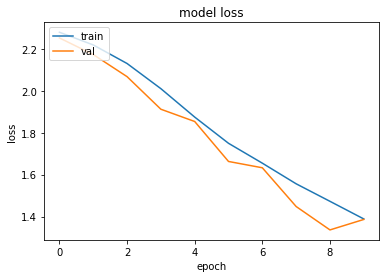

In [19]:
plt.plot(history_1_1.history['loss'])
plt.plot(history_1_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

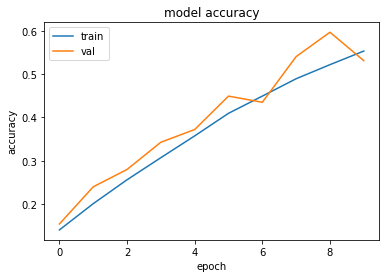

In [20]:
plt.plot(history_1_1.history['accuracy'])
plt.plot(history_1_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
result_1_1 = model_1_1.evaluate(X_val, y_val, verbose=0)
print('Val_acc using Batch ANN adam : ', result_1_1[1])

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Model':['SGD'], 'accuracy': [result_1_1[1]]})
results

Val_acc using Batch ANN adam :  0.531166672706604


,Model,accuracy
0,SGD,0.531167


#### Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [23]:
### Now for Adam

##Initialize the Artificial Neural Network Classifier
model_1_2 = Sequential()

#Adding Input layer and activation functions ReLU
model_1_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
model_1_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
model_1_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
model_1_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
model_1_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
model_1_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
model_1_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
model_1_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
model_1_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
model_1_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model_1_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model_1_2.add(Activation('softmax'))

In [24]:
# compiling the ANN classifier
model_1_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history_1_2 = model_1_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 3s 11ms/step - loss: 2.3316 - accuracy: 0.1053 - val_loss: 2.2954 - val_accuracy: 0.1188
Epoch 2/10
210/210 [==============================] - 3s 13ms/step - loss: 2.2028 - accuracy: 0.1666 - val_loss: 1.7141 - val_accuracy: 0.3931
Epoch 3/10
210/210 [==============================] - 2s 11ms/step - loss: 1.6171 - accuracy: 0.4318 - val_loss: 1.3024 - val_accuracy: 0.5718
Epoch 4/10
210/210 [==============================] - 2s 12ms/step - loss: 1.3013 - accuracy: 0.5658 - val_loss: 1.1475 - val_accuracy: 0.6294
Epoch 5/10
210/210 [==============================] - 3s 13ms/step - loss: 1.1294 - accuracy: 0.6341 - val_loss: 1.0289 - val_accuracy: 0.6817
Epoch 6/10
210/210 [==============================] - 2s 12ms/step - loss: 1.0058 - accuracy: 0.6816 - val_loss: 0.9696 - val_accuracy: 0.6933
Epoch 7/10
210/210 [==============================] - 3s 14ms/step - loss: 0.9397 - accuracy: 0.7064 - val_loss: 0.9776 - val_accuracy: 0.6884

The validation accuracy for the model with SGD comes out to be 53% while the same with Adam optimizer improved to 75%

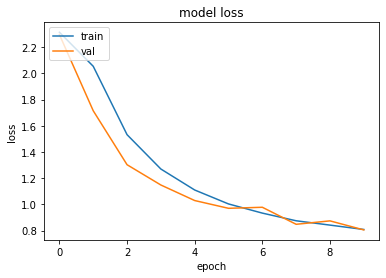

In [26]:
plt.plot(history_1_2.history['loss'])
plt.plot(history_1_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

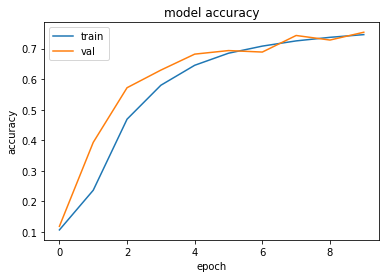

In [27]:
plt.plot(history_1_2.history['accuracy'])
plt.plot(history_1_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
result_1_2 = model_1_2.evaluate(X_val, y_val, verbose=0)
print('Val_acc using Batch ANN adam : ', result_1_2[1])

temp = {'Model':'Adam', 'accuracy': result_1_2[1]}
results = results.append(temp, ignore_index=True)
results

Val_acc using Batch ANN adam :  0.7532222270965576


,Model,accuracy
0,SGD,0.531167
1,Adam,0.753222


#### Tweaking the Learning rate of the model (Adam)

Since we observed significantly better val_acc for the Adam optimizer, we will persist with Adam but try and tweak few hyperparameters to obtain better accuracy

In [29]:
### Now for Adam

##Initialize the Artificial Neural Network Classifier
model_1_3 = Sequential()

#Adding Input layer and activation functions ReLU
model_1_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
model_1_3.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
model_1_3.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
model_1_3.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
model_1_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
model_1_3.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
model_1_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
model_1_3.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
model_1_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
model_1_3.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model_1_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model_1_3.add(Activation('softmax'))

In [30]:
#Setting the learning rate
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
model_1_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_1_3 = model_1_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 3s 11ms/step - loss: 2.2951 - accuracy: 0.1473 - val_loss: 2.0935 - val_accuracy: 0.3049
Epoch 2/100
210/210 [==============================] - 3s 13ms/step - loss: 1.9723 - accuracy: 0.3416 - val_loss: 1.6471 - val_accuracy: 0.4906
Epoch 3/100
210/210 [==============================] - 2s 11ms/step - loss: 1.5870 - accuracy: 0.5008 - val_loss: 1.4080 - val_accuracy: 0.5623
Epoch 4/100
210/210 [==============================] - 3s 13ms/step - loss: 1.3738 - accuracy: 0.5741 - val_loss: 1.2861 - val_accuracy: 0.6094
Epoch 5/100
210/210 [==============================] - 3s 14ms/step - loss: 1.2565 - accuracy: 0.6146 - val_loss: 1.1997 - val_accuracy: 0.6336
Epoch 6/100
210/210 [==============================] - 3s 13ms/step - loss: 1.1661 - accuracy: 0.6492 - val_loss: 1.1390 - val_accuracy: 0.6521
Epoch 7/100
210/210 [==============================] - 3s 14ms/step - loss: 1.1227 - accuracy: 0.6615 - val_loss: 1.0973 - val_accuracy:

210/210 [==============================] - 3s 15ms/step - loss: 0.4522 - accuracy: 0.8624 - val_loss: 0.6461 - val_accuracy: 0.8159
Epoch 58/100
210/210 [==============================] - 3s 15ms/step - loss: 0.4463 - accuracy: 0.8641 - val_loss: 0.6243 - val_accuracy: 0.8267
Epoch 59/100
210/210 [==============================] - 3s 14ms/step - loss: 0.4298 - accuracy: 0.8691 - val_loss: 0.6295 - val_accuracy: 0.8219
Epoch 60/100
210/210 [==============================] - 3s 15ms/step - loss: 0.4269 - accuracy: 0.8687 - val_loss: 0.6339 - val_accuracy: 0.8207
Epoch 61/100
210/210 [==============================] - 3s 16ms/step - loss: 0.4214 - accuracy: 0.8718 - val_loss: 0.6409 - val_accuracy: 0.8164
Epoch 62/100
210/210 [==============================] - 3s 15ms/step - loss: 0.4194 - accuracy: 0.8683 - val_loss: 0.6335 - val_accuracy: 0.8219
Epoch 63/100
210/210 [==============================] - 3s 16ms/step - loss: 0.4125 - accuracy: 0.8731 - val_loss: 0.6190 - val_accuracy: 0.825

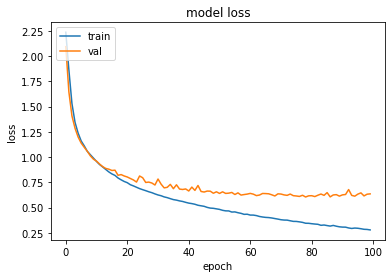

In [31]:
plt.plot(history_1_3.history['loss'])
plt.plot(history_1_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

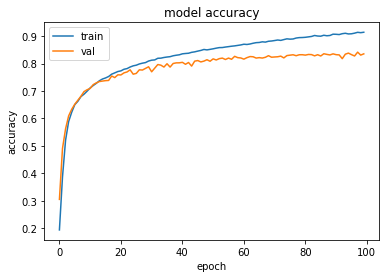

In [32]:
plt.plot(history_1_3.history['accuracy'])
plt.plot(history_1_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
result_1_3 = model_1_3.evaluate(X_val, y_val, verbose=0)
print('Val_acc using Batch ANN adam : ', result_1_3[1])

Val_acc using Batch ANN adam :  0.8357222080230713


In [34]:
temp = {'Model':'Adam (lr=0.0001)', 'accuracy': result_1_3[1]}
results = results.append(temp, ignore_index=True)
results

,Model,accuracy
0,SGD,0.531167
1,Adam,0.753222
2,Adam (lr=0.0001),0.835722


### Implementing batch normalization for training the neural network

In [35]:
model_2 = Sequential()

In [36]:
#Adding Input layer and activation functions ReLU
model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
model_2.add(BatchNormalization())
#Adding Activation function 
model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
model_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_2.add(BatchNormalization())
#Adding Activation function
model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
model_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_2.add(BatchNormalization())
#Adding Activation function
model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_2.add(BatchNormalization())
#Adding Activation function
model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_2.add(BatchNormalization())
#Adding Activation function
model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model_2.add(Activation('softmax'))

In [37]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

In [38]:
# Adam optimizer
adam = optimizers.Adam(lr = 0.0001)
model_2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
history_BN = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size= 256, epochs = 100, verbose = 1)

Epoch 1/100
165/165 [==============================] - 4s 17ms/step - loss: 2.3480 - accuracy: 0.1694 - val_loss: 2.1689 - val_accuracy: 0.2163
Epoch 2/100
165/165 [==============================] - 3s 19ms/step - loss: 1.7822 - accuracy: 0.4125 - val_loss: 1.7978 - val_accuracy: 0.4199
Epoch 3/100
165/165 [==============================] - 3s 17ms/step - loss: 1.4771 - accuracy: 0.5642 - val_loss: 1.5308 - val_accuracy: 0.5393
Epoch 4/100
165/165 [==============================] - 3s 21ms/step - loss: 1.2649 - accuracy: 0.6517 - val_loss: 1.3707 - val_accuracy: 0.6121
Epoch 5/100
165/165 [==============================] - 3s 19ms/step - loss: 1.0980 - accuracy: 0.7056 - val_loss: 1.3112 - val_accuracy: 0.6027
Epoch 6/100
165/165 [==============================] - 3s 20ms/step - loss: 0.9823 - accuracy: 0.7324 - val_loss: 1.1833 - val_accuracy: 0.6487
Epoch 7/100
165/165 [==============================] - 3s 18ms/step - loss: 0.8884 - accuracy: 0.7552 - val_loss: 1.2006 - val_accuracy:

165/165 [==============================] - 3s 19ms/step - loss: 0.1188 - accuracy: 0.9668 - val_loss: 0.9077 - val_accuracy: 0.7711
Epoch 58/100
165/165 [==============================] - 3s 20ms/step - loss: 0.1480 - accuracy: 0.9560 - val_loss: 1.0158 - val_accuracy: 0.7487
Epoch 59/100
165/165 [==============================] - 3s 18ms/step - loss: 0.1553 - accuracy: 0.9544 - val_loss: 1.0513 - val_accuracy: 0.7454
Epoch 60/100
165/165 [==============================] - 3s 20ms/step - loss: 0.1069 - accuracy: 0.9702 - val_loss: 0.9585 - val_accuracy: 0.7628
Epoch 61/100
165/165 [==============================] - 3s 19ms/step - loss: 0.0819 - accuracy: 0.9792 - val_loss: 1.2707 - val_accuracy: 0.7113
Epoch 62/100
165/165 [==============================] - 3s 20ms/step - loss: 0.1604 - accuracy: 0.9538 - val_loss: 1.0302 - val_accuracy: 0.7571
Epoch 63/100
165/165 [==============================] - 3s 19ms/step - loss: 0.1464 - accuracy: 0.9555 - val_loss: 0.9683 - val_accuracy: 0.759

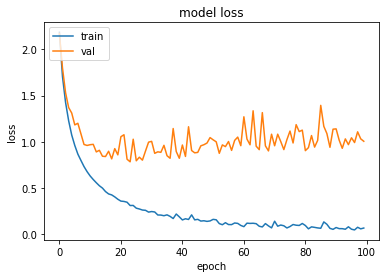

In [40]:
plt.plot(history_BN.history['loss'])
plt.plot(history_BN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

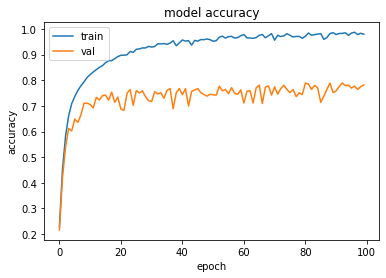

In [41]:
plt.plot(history_BN.history['accuracy'])
plt.plot(history_BN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
result_2 = model_2.evaluate(X_val, y_val, verbose=0)
print('Val_acc using Batch ANN adam : ', result_2[1])

Val_acc using Batch ANN adam :  0.7818333506584167


In [43]:
temp = {'Model':'Adam (lr = 0.0001) + BN', 'accuracy': result_2[1]}
results = results.append(temp, ignore_index=True)
results

,Model,accuracy
0,SGD,0.531167
1,Adam,0.753222
2,Adam (lr=0.0001),0.835722
3,Adam (lr = 0.0001) + BN,0.781833


### Implementing batch normalization and Dropout for training the neural network

In [44]:
model_3 = Sequential()

In [45]:
# Input Layer
#Adding Input layer and activation functions ReLU
model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
model_3.add(BatchNormalization())
#Adding Activation function
model_3.add(Activation('relu'))
#Adding Dropout Layer
model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_3.add(BatchNormalization())
#Adding Activation function
model_3.add(Activation('relu'))
#Adding Dropout Layer
model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_3.add(BatchNormalization())
#Adding Activation function
model_3.add(Activation('relu'))
#Adding Dropout Layer
model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_3.add(BatchNormalization())
#Adding Activation function
model_3.add(Activation('relu'))
#Adding Dropout Layer
model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_3.add(BatchNormalization())
#Adding Activation function
model_3.add(Activation('relu'))
#Adding Dropout Layer
model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model_3.add(Activation('softmax'))

In [46]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_25 (Activation)   (None, 256)              

In [47]:
# Adam optimizer
adam = optimizers.Adam(lr = 0.001)
model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
history_BNDO = model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size= 128, epochs = 300, verbose = 1)

Epoch 1/300
329/329 [==============================] - 8s 16ms/step - loss: 2.6486 - accuracy: 0.1001 - val_loss: 2.3025 - val_accuracy: 0.1032
Epoch 2/300
329/329 [==============================] - 5s 15ms/step - loss: 2.3245 - accuracy: 0.1029 - val_loss: 2.3008 - val_accuracy: 0.1110
Epoch 3/300
329/329 [==============================] - 5s 15ms/step - loss: 2.3080 - accuracy: 0.1055 - val_loss: 2.2966 - val_accuracy: 0.1243
Epoch 4/300
329/329 [==============================] - 5s 14ms/step - loss: 2.2970 - accuracy: 0.1079 - val_loss: 2.2344 - val_accuracy: 0.1443
Epoch 5/300
329/329 [==============================] - 5s 15ms/step - loss: 2.2195 - accuracy: 0.1428 - val_loss: 2.0683 - val_accuracy: 0.1761
Epoch 6/300
329/329 [==============================] - 5s 15ms/step - loss: 2.0917 - accuracy: 0.1780 - val_loss: 2.2141 - val_accuracy: 0.1513
Epoch 7/300
329/329 [==============================] - 5s 14ms/step - loss: 2.0142 - accuracy: 0.2051 - val_loss: 2.0028 - val_accuracy:

329/329 [==============================] - 5s 15ms/step - loss: 0.9569 - accuracy: 0.7190 - val_loss: 1.0463 - val_accuracy: 0.6734
Epoch 58/300
329/329 [==============================] - 5s 15ms/step - loss: 0.9464 - accuracy: 0.7176 - val_loss: 1.1092 - val_accuracy: 0.6551
Epoch 59/300
329/329 [==============================] - 5s 16ms/step - loss: 0.9676 - accuracy: 0.7158 - val_loss: 0.9797 - val_accuracy: 0.7010
Epoch 60/300
329/329 [==============================] - 5s 15ms/step - loss: 0.9234 - accuracy: 0.7294 - val_loss: 1.0153 - val_accuracy: 0.7072
Epoch 61/300
329/329 [==============================] - 5s 15ms/step - loss: 0.9163 - accuracy: 0.7244 - val_loss: 1.0535 - val_accuracy: 0.6841
Epoch 62/300
329/329 [==============================] - 5s 15ms/step - loss: 0.9242 - accuracy: 0.7280 - val_loss: 0.9932 - val_accuracy: 0.6994
Epoch 63/300
329/329 [==============================] - 5s 15ms/step - loss: 0.9442 - accuracy: 0.7218 - val_loss: 0.8207 - val_accuracy: 0.772

329/329 [==============================] - 5s 15ms/step - loss: 0.7917 - accuracy: 0.7730 - val_loss: 0.7012 - val_accuracy: 0.8057
Epoch 114/300
329/329 [==============================] - 5s 15ms/step - loss: 0.7698 - accuracy: 0.7773 - val_loss: 1.0742 - val_accuracy: 0.6761
Epoch 115/300
329/329 [==============================] - 5s 15ms/step - loss: 0.8041 - accuracy: 0.7697 - val_loss: 0.7863 - val_accuracy: 0.7607
Epoch 116/300
329/329 [==============================] - 4s 13ms/step - loss: 0.7898 - accuracy: 0.7725 - val_loss: 0.8251 - val_accuracy: 0.7546
Epoch 117/300
329/329 [==============================] - 4s 14ms/step - loss: 0.7895 - accuracy: 0.7722 - val_loss: 0.7923 - val_accuracy: 0.7657
Epoch 118/300
329/329 [==============================] - 4s 14ms/step - loss: 0.7868 - accuracy: 0.7763 - val_loss: 0.7689 - val_accuracy: 0.7705
Epoch 119/300
329/329 [==============================] - 4s 14ms/step - loss: 0.7855 - accuracy: 0.7739 - val_loss: 0.6354 - val_accuracy:

329/329 [==============================] - 4s 13ms/step - loss: 0.7368 - accuracy: 0.7932 - val_loss: 0.6998 - val_accuracy: 0.7899
Epoch 170/300
329/329 [==============================] - 4s 13ms/step - loss: 0.7420 - accuracy: 0.7907 - val_loss: 0.8012 - val_accuracy: 0.7582
Epoch 171/300
329/329 [==============================] - 4s 14ms/step - loss: 0.7334 - accuracy: 0.7914 - val_loss: 0.6366 - val_accuracy: 0.8132
Epoch 172/300
329/329 [==============================] - 4s 14ms/step - loss: 0.7273 - accuracy: 0.7942 - val_loss: 0.7352 - val_accuracy: 0.7878
Epoch 173/300
329/329 [==============================] - 5s 14ms/step - loss: 0.7302 - accuracy: 0.7922 - val_loss: 0.7232 - val_accuracy: 0.7877
Epoch 174/300
329/329 [==============================] - 5s 15ms/step - loss: 0.7290 - accuracy: 0.7937 - val_loss: 0.6070 - val_accuracy: 0.8218
Epoch 175/300
329/329 [==============================] - 5s 15ms/step - loss: 0.7469 - accuracy: 0.7903 - val_loss: 0.6961 - val_accuracy:

329/329 [==============================] - 5s 14ms/step - loss: 0.7028 - accuracy: 0.8040 - val_loss: 0.5692 - val_accuracy: 0.8374
Epoch 226/300
329/329 [==============================] - 5s 14ms/step - loss: 0.7126 - accuracy: 0.7985 - val_loss: 0.5894 - val_accuracy: 0.8317
Epoch 227/300
329/329 [==============================] - 5s 14ms/step - loss: 0.7053 - accuracy: 0.8017 - val_loss: 0.5724 - val_accuracy: 0.8346
Epoch 228/300
329/329 [==============================] - 5s 14ms/step - loss: 0.7211 - accuracy: 0.7943 - val_loss: 0.6438 - val_accuracy: 0.8070
Epoch 229/300
329/329 [==============================] - 5s 15ms/step - loss: 0.7206 - accuracy: 0.7995 - val_loss: 0.6315 - val_accuracy: 0.8069
Epoch 230/300
329/329 [==============================] - 5s 17ms/step - loss: 0.6778 - accuracy: 0.8102 - val_loss: 0.6433 - val_accuracy: 0.8091
Epoch 231/300
329/329 [==============================] - 5s 16ms/step - loss: 0.6853 - accuracy: 0.8093 - val_loss: 0.6415 - val_accuracy:

329/329 [==============================] - 5s 15ms/step - loss: 0.6822 - accuracy: 0.8084 - val_loss: 0.6334 - val_accuracy: 0.8136
Epoch 282/300
329/329 [==============================] - 5s 15ms/step - loss: 0.6761 - accuracy: 0.8104 - val_loss: 0.5901 - val_accuracy: 0.8294
Epoch 283/300
329/329 [==============================] - 5s 15ms/step - loss: 0.6627 - accuracy: 0.8135 - val_loss: 0.5146 - val_accuracy: 0.8530
Epoch 284/300
329/329 [==============================] - 5s 14ms/step - loss: 0.6689 - accuracy: 0.8134 - val_loss: 0.6144 - val_accuracy: 0.8204
Epoch 285/300
329/329 [==============================] - 4s 13ms/step - loss: 0.6682 - accuracy: 0.8119 - val_loss: 0.6812 - val_accuracy: 0.7901
Epoch 286/300
329/329 [==============================] - 4s 14ms/step - loss: 0.6955 - accuracy: 0.8055 - val_loss: 0.5876 - val_accuracy: 0.8248
Epoch 287/300
329/329 [==============================] - 5s 14ms/step - loss: 0.6648 - accuracy: 0.8140 - val_loss: 0.6368 - val_accuracy:

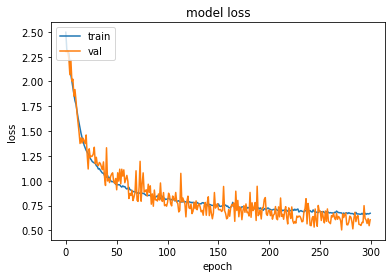

In [49]:
plt.plot(history_BNDO.history['loss'])
plt.plot(history_BNDO.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

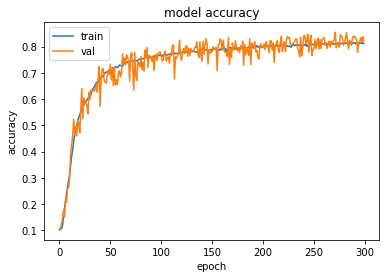

In [50]:
plt.plot(history_BNDO.history['accuracy'])
plt.plot(history_BNDO.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
result_3 = model_3.evaluate(X_val, y_val, verbose=0)
print('Val_acc using Batch+Dropout ANN adam : ', result_3[1])

Val_acc using Batch+Dropout ANN adam :  0.820722222328186


In [52]:
temp = {'Model':'Adam(lr = 0.001) + BN + DO', 'accuracy': result_3[1]}
results = results.append(temp, ignore_index=True)
results

,Model,accuracy
0,SGD,0.531167
1,Adam,0.753222
2,Adam (lr=0.0001),0.835722
3,Adam (lr = 0.0001) + BN,0.781833
4,Adam(lr = 0.001) + BN + DO,0.820722


## Observations:

We observe that the ANN with batch normalization + dropout layer yields the most optimal learning curve for the dataset. Also, the optimizer Adam is preferred over the SGD.

The learning rate of 0.001 is optimal for the learning curve and coupled along with the Batch Normalization and Dropout layer architecture proves to be the best model for classification in this scenario.